In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## (a)

In [2]:
d1 = 5
d2 = 5
n = d1**2
m = d2**2

f = lambda i, j, k, l: np.sqrt(i + 2*j + 3*k + 4*l + 10)

In [3]:
A = np.fromfunction(f, (d1, d1, d2, d2), dtype=float).reshape((d1**2, d2**2))

In [4]:
U, S, Vh = LA.svd(A)

In [5]:
# TODO: нарисовать скейлинг

"""

import timeit

r = 100

for d1 in np.arange(1, r+1):
    for d2 in np.arange(1, d1+1):
        A = np.fromfunction(f, (d1, d1, d2, d2), dtype=float)
        A = A.reshape((d1**2, d2**2))
        dt = timeit.repeat("LA.svd(A)", globals=globals(), number=1, repeat=10).mean()
        # print(f"d1={d1}, d2={d2}, time={dt}")
        
"""
;

''

## (b)

In [6]:
d1 = 10
d2 = 8

A = np.fromfunction(f, (d1, d1, d2, d2), dtype=float).reshape((d1**2, d2**2))
A = A / LA.norm(A)

## (c)

In [7]:
U, S, Vh = LA.svd(A)
LA.norm(S)

1.0000000000000004

In [8]:
U.shape, S.shape, Vh.shape

((100, 100), (64,), (64, 64))

## (d), (e)

In [9]:
delta = 1e-4
r_delta = np.sum(S > delta)
eps_err = LA.norm(S[r_delta:])

print(f"effective rank at delta={delta} is r={r_delta}")
print(f"truncation error at delta={delta} is eps={eps_err:.4}")

effective rank at delta=0.0001 is r=3
truncation error at delta=0.0001 is eps=1.048e-05


## bonus

In [10]:
rs = np.arange(1, len(S))
errs = []
for r in rs:
    errs.append(LA.norm(S[r:]))

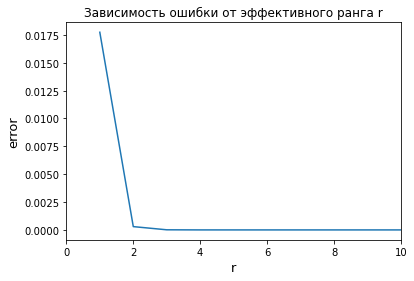

In [11]:
plt.plot(rs, errs)
plt.xlim(0, 10)
plt.title("Зависимость ошибки от эффективного ранга r")
plt.xlabel("r", fontsize=13)
plt.ylabel("error", fontsize=13)
plt.show()

## (f)

In [12]:
r = r_delta
# compute restricted rank approximation of A
A_r = U[:, :r] @ np.diag(S[:r]) @ Vh[:r, :]

In [13]:
LA.norm(A_r - A)

1.0484615133213367e-05